# Kruskal's

In [3]:
class UnionFind:
  def __init__(self, vertices):
    self.parent = {u: u for u in vertices}

  def find(self, node):
    while self.parent[node] != node:
      node = self.parent[node]
    return node

  def union(self, u, v):
    root1 = self.find(u)
    root2 = self.find(v)
    if root1 != root2:
      self.parent[root2] = root1
      return True
    return False


def kruskal(adjacency_list):
  mst = []
  edges = []
  for u in adjacency_list:
    for v, weight in adjacency_list[u]:
      edges.append((weight, u, v))
  edges.sort()

  ufs = UnionFind(adjacency_list)

  for weight, u, v in edges:
    if ufs.union(u, v):
      mst.append((u, v, weight))
  return mst


adjacency_list = {
    0: [(1, 10), (2, 6)],
    1: [(0, 10), (3, 15), (2, 4)],
    2: [(0, 6), (1, 4), (3, 11)],
    3: [(1, 15), (2, 11)]
}

kruskal(adjacency_list) == [(1, 2, 4), (0, 2, 6), (2, 3, 11)]

True

In [4]:
adjacency_list = {
    'A': [('C', 3), ('D', 3), ('B', 2)],
    'B': [('A', 2), ('C', 4), ('E', 3)],
    'C': [('A', 3), ('B', 4), ('F', 6), ('E', 1)],
    'D': [('A', 3), ('F', 7)],
    'E': [('B', 3), ('C', 1), ('F', 8)],
    'F': [('D', 7), ('E', 8), ('G', 9), ('C', 6)],
    'G': [('F', 9)]
}

kruskal(adjacency_list) == [('C', 'E', 1),
                            ('A', 'B', 2),
                            ('A', 'C', 3),
                            ('A', 'D', 3),
                            ('C', 'F', 6),
                            ('F', 'G', 9)]

True

# Heap Construction [MaxHeap]

In [22]:
class MaxHeap:
  def __init__(self, H, method='one_by_one'):
    self.heap = []
    if method == 'one_by_one':
      self._build_heap_one_by_one(H)
    elif method == 'heapify':
      self._build_heap_heapify(H)

  def insert(self, value):
    # 1. append
    self.heap.append(value)
    # 2. heapify (bottom to top)
    self._heapify_up(len(self.heap)-1)

  def _swap(self, i, j):
    self.heap[i], self.heap[j] = self.heap[j], self.heap[i]

  def _heapify_up(self, index):
    parent_index = (index-1)//2
    if index > 0 and self.heap[parent_index] < self.heap[index]:
      self._swap(index, parent_index)
      self._heapify_up(parent_index)

  def _heapify_down(self, index):
    largest = index
    left = index*2 + 1
    right = index*2 + 2
    if left < len(self.heap) and self.heap[left] > self.heap[largest]:
      largest = left
    if right < len(self.heap) and self.heap[right] > self.heap[largest]:
      largest = right
    if largest != index:
      self._swap(index, largest)
      self._heapify_down(largest)

  def _build_heap_one_by_one(self, H):
    for value in H:
      self.insert(value)

  def _build_heap_heapify(self, H):
    self.heap = H
    middle_index = len(self.heap)//2-1
    for i in range(middle_index, -1, -1):
      self._heapify_down(i)

  def print_heap(self):
    # print(self.heap)
    print(' '.join(map(str, self.heap)))


H = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
max_heap = MaxHeap(H, method='heapify')
# max_heap = MaxHeap(H, method='one_by_one')
max_heap.print_heap()

100 90 70 80 50 60 30 10 40 20


# Heap Construction [MinHeap]

In [27]:
class MinHeap:
  def __init__(self, H, method='one_by_one'):
    self.heap = []
    if method == 'one_by_one':
      self._build_heap_one_by_one(H)
    elif method == 'heapify':
      self._build_heap_heapify(H)

  def insert(self, value):
    # 1. append
    self.heap.append(value)
    # 2. heapify (bottom to top)
    self._heapify_up(len(self.heap)-1)

  def _swap(self, i, j):
    self.heap[i], self.heap[j] = self.heap[j], self.heap[i]

  def _heapify_up(self, index):
    parent_index = (index-1)//2
    if index > 0 and self.heap[parent_index] > self.heap[index]:
      self._swap(index, parent_index)
      self._heapify_up(parent_index)

  def _heapify_down(self, index):
    smallest = index
    left = index*2 + 1
    right = index*2 + 2
    if left < len(self.heap) and self.heap[left] < self.heap[smallest]:
      smallest = left
    if right < len(self.heap) and self.heap[right] < self.heap[smallest]:
      smallest = right
    if smallest != index:
      self._swap(index, smallest)
      self._heapify_down(smallest)

  def _build_heap_one_by_one(self, H):
    for value in H:
      self.insert(value)

  def _build_heap_heapify(self, H):
    self.heap = H
    middle_index = len(self.heap)//2-1
    for i in range(middle_index, -1, -1):
      self._heapify_down(i)

  def print_heap(self):
    # print(self.heap)
    print(' '.join(map(str, self.heap)))


H = [100, 90, 80, 70, 60, 50, 40, 30, 20, 10]
min_heap = MinHeap(H, method='heapify')
# min_heap = MinHeap(H, method='one_by_one')
min_heap.print_heap()

10 20 40 30 60 50 80 100 70 90


# MinHeap `delete()`

In [32]:
class MinHeap:
  def __init__(self, H, method='one_by_one'):
    self.heap = []
    if method == 'one_by_one':
      self._build_heap_one_by_one(H)
    elif method == 'heapify':
      self._build_heap_heapify(H)

  def insert(self, value):
    # 1. append
    self.heap.append(value)
    # 2. heapify (bottom to top)
    self._heapify_up(len(self.heap)-1)

  def delete(self):
    self._swap(0, len(self.heap)-1)
    root = self.heap.pop()
    self._heapify_down(0)
    return root

  def _swap(self, i, j):
    self.heap[i], self.heap[j] = self.heap[j], self.heap[i]

  def _heapify_up(self, index):
    parent_index = (index-1)//2
    if index > 0 and self.heap[parent_index] > self.heap[index]:
      self._swap(index, parent_index)
      self._heapify_up(parent_index)

  def _heapify_down(self, index):
    smallest = index
    left = index*2 + 1
    right = index*2 + 2
    if left < len(self.heap) and self.heap[left] < self.heap[smallest]:
      smallest = left
    if right < len(self.heap) and self.heap[right] < self.heap[smallest]:
      smallest = right
    if smallest != index:
      self._swap(index, smallest)
      self._heapify_down(smallest)

  def _build_heap_one_by_one(self, H):
    for value in H:
      self.insert(value)

  def _build_heap_heapify(self, H):
    self.heap = H
    middle_index = len(self.heap)//2-1
    for i in range(middle_index, -1, -1):
      self._heapify_down(i)

  def print_heap(self):
    # print(self.heap)
    print(' '.join(map(str, self.heap)))


H = [100, 90, 80, 70, 60, 50, 40, 30, 20, 10]
min_heap = MinHeap(H, method='heapify')
print(min_heap.delete())
print(min_heap.delete())
print(min_heap.delete())
min_heap.print_heap()

10
20
30
40 60 50 70 90 100 80


# Heap sort [MinHeap]

In [38]:
class MinHeap:
  def __init__(self, H, method='one_by_one'):
    self.heap = []
    if method == 'one_by_one':
      self._build_heap_one_by_one(H)
    elif method == 'heapify':
      self._build_heap_heapify(H)

  def insert(self, value):
    # 1. append
    self.heap.append(value)
    # 2. heapify (bottom to top)
    self._heapify_up(len(self.heap)-1)

  def delete(self):
    self._swap(0, len(self.heap)-1)
    root = self.heap.pop()
    self._heapify_down(0)
    return root

  def _swap(self, i, j):
    self.heap[i], self.heap[j] = self.heap[j], self.heap[i]

  def _heapify_up(self, index):
    parent_index = (index-1)//2
    if index > 0 and self.heap[parent_index] > self.heap[index]:
      self._swap(index, parent_index)
      self._heapify_up(parent_index)

  def _heapify_down(self, index):
    smallest = index
    left = index*2 + 1
    right = index*2 + 2
    if left < len(self.heap) and self.heap[left] < self.heap[smallest]:
      smallest = left
    if right < len(self.heap) and self.heap[right] < self.heap[smallest]:
      smallest = right
    if smallest != index:
      self._swap(index, smallest)
      self._heapify_down(smallest)

  def _build_heap_one_by_one(self, H):
    for value in H:
      self.insert(value)

  def _build_heap_heapify(self, H):
    self.heap = H
    middle_index = len(self.heap)//2-1
    for i in range(middle_index, -1, -1):
      self._heapify_down(i)

  def heap_sort(self):
    temp_heap = self.heap.copy()
    output = []
    for i in range(len(self.heap)):
      root = self.delete()
      output.append(root)
    self.heap = temp_heap
    return output

  def print_heap(self):
    # print(self.heap)
    print(' '.join(map(str, self.heap)))


H = [100, 90, 80, 70, 60, 50, 40, 30, 20, 10]
min_heap = MinHeap(H, method='heapify')

min_heap.print_heap()
min_heap.heap_sort()
min_heap.print_heap()

10 20 40 30 60 50 80 100 70 90


[10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

10 20 40 30 60 50 80 100 70 90


# BST 2

In [54]:
class BST:
  def __init__(self, values=[]):
    self.make_empty()
    for value in values:
      self.insert(value)

  def is_empty(self):
    return self.value is None

  def is_leaf(self):
    return self.value and self.left.is_empty() and self.right.is_empty()

  def make_empty(self):
    self.value, self.left, self.right = None, None, None

  def inorder_traversal(self):
    if self.is_empty():
      return []
    return self.left.inorder_traversal() + [self.value] + self.right.inorder_traversal()

  def insert(self, value):
    if self.is_empty():
      self.value = value
      self.left = BST()
      self.right = BST()
    elif value < self.value:
      self.left.insert(value)
    elif value > self.value:
      self.right.insert(value)

  def delete(self, value):
    if self.is_empty():
      return
    if value < self.value:
      self.left.delete(value)
    elif value > self.value:
      self.right.delete(value)
    else:  # value == self.value
      if self.is_leaf():
        self.make_empty()
      elif self.left.is_empty():
        self._replace_with_right_subtree()
      elif self.right.is_empty():
        self._replace_with_left_subtree()
      else:
        left_max_value = self.left.get_max_value()
        self.value = left_max_value
        self.left.delete(left_max_value)

  def _replace_with_left_subtree(self):
    self.value, self.left, self.right = (self.left.value,
                                         self.left.left, self.left.right)

  def _replace_with_right_subtree(self):
    self.value, self.left, self.right = (self.right.value,
                                         self.right.left, self.right.right)

  def find(self, value):
    if self.is_empty():
      return False
    if self.value == value:
      return True
    if value < self.value:
      return self.left.find(value)
    return self.right.find(value)

  def get_min_value(self):
    if self.is_empty():
      return None
    if self.left.is_empty():
      return self.value
    return self.left.get_min_value()

  def get_max_value(self):
    if self.is_empty():
      return None
    if self.right.is_empty():
      return self.value
    return self.right.get_max_value()

  def __str__(self):
    return str(self.inorder_traversal())


bst = BST([17, 5, 13, 20, 2, 3, 1, 100])
bst.delete(16)
print(bst)
# print(bst.get_min_value())
# print(bst.get_max_value())
# print(bst.find(13))
# print(bst.find(23))

[1, 2, 3, 5, 13, 17, 20, 100]


In [4]:
(12, 19) > (12, 20)

False

# GrPA 1

In [31]:
class MinHeap:
  def __init__(self, H, method='one_by_one'):
    self.heap = []
    if method == 'one_by_one':
      self._build_heap_one_by_one(H)
    elif method == 'heapify':
      self._build_heap_heapify(H)
    else:
      raise ValueError("Invalid method. Choose 'one_by_one' or 'heapify'.")

  def insert(self, value):
    # add value to the end
    self.heap.append(value)
    # fix heap property (bottom to top)
    self._heapify_up(len(self.heap) - 1)

  def delete(self):
    if self.is_empty():
      return None
    # swap root with last element and remove last element
    self._swap(0, len(self.heap) - 1)
    root = self.heap.pop()
    # fix heap property (top to bottom)
    self._heapify_down(0)
    return root

  def is_empty(self):
    # return true if heap is empty, else false
    return len(self.heap) == 0

  def _build_heap_one_by_one(self, H):
    for value in H:
      self.insert(value)

  def _build_heap_heapify(self, H):
    self.heap = H
    # build heap property (top to bottom)
    for i in range(len(H) // 2 - 1, -1, -1):
      self._heapify_down(i)

  def _heapify_up(self, index):
    parent_index = (index - 1) // 2
    if index > 0 and self.heap[parent_index] > self.heap[index]:
      self._swap(index, parent_index)
      self._heapify_up(parent_index)

  def _heapify_down(self, index):
    smallest = index
    left = 2 * index + 1
    right = 2 * index + 2
    if left < len(self.heap) and self.heap[left] < self.heap[smallest]:
      smallest = left
    if right < len(self.heap) and self.heap[right] < self.heap[smallest]:
      smallest = right
    if smallest != index:
      self._swap(index, smallest)
      self._heapify_down(smallest)

  def _swap(self, i, j):
    self.heap[i], self.heap[j] = self.heap[j], self.heap[i]

  def print_heap(self):
    # print heap in space-separated format
    print(" ".join(map(str, self.heap)))

# test

In [29]:
class PriorityQueue:
  def __init__(self):
    self.min_heap = MinHeap([])

  def enqueue(self, priority, item):
    self.min_heap.insert((priority, item))

  def dequeue(self):
    return self.min_heap.delete()

  def is_empty(self):
    return self.min_heap.is_empty()

  def __str__(self):
    return str(self.min_heap.heap)


# test

In [30]:
def merge_k_lists(matrix):
  pq = PriorityQueue()
  k = len(matrix)
  for which_k in range(k):
    num_index = 0
    num = matrix[which_k][num_index]
    pq.enqueue(num, (num_index, which_k))

  output = []
  while not pq.is_empty():
    num, (num_index, which_k) = pq.dequeue()
    output.append(num)
    if num_index < len(matrix[which_k])-1:
      num_index += 1
      num = matrix[which_k][num_index]
      pq.enqueue(num, (num_index, which_k))

  return output


merge_k_lists([
    [4, 5, 13, 17],
    [8, 26, 69, 122, 135],
    [10, 101, 125, 450],
])

[4, 5, 8, 10, 13, 17, 26, 69, 101, 122, 125, 135, 450]

# GrPA 2

In [96]:
class Tree:
  # constructor
  def __init__(self, initval=None):
    self.value = initval
    if self.value:
      self.left = Tree()
      self.right = Tree()
    else:
      self.left = self.right = None
    return

  # Only empty node has value None
  def isempty(self):
    return (self.value == None)

  # Leaf nodes have both children empty
  def isleaf(self):
    return (self.value != None and self.left.isempty() and self.right.isempty())


def insertToBST(root, x):
  # insert element to BST
  # Tree should have at least one element.
  temp = root
  while (not temp.isempty()):
    if (x < temp.value):
      temp = temp.left
    else:
      temp = temp.right

  temp.value = x
  temp.left = Tree()
  temp.right = Tree()
# gray code 👆


def inorder_traversal(node, result=[]):  # NEW 😱
  if node.value is not None:
    inorder_traversal(node.left, result)
    result.append(node.value)
    inorder_traversal(node.right, result)
    return result


def maxLessThan(root, k):  # NEW 😱
  order = inorder_traversal(root)
  if order[0] > k:
    return None
  ans = order[0]
  for num in order:
    if num > k:
      return ans
    ans = num


# gray code 👇
L = [50, 52, 54, 74, 93, 100, 114, 124, 130, 143]
x = 92
root = Tree(L[0])
for item in L[1:]:
  insertToBST(root, item)

maxLessThan(root, x)

74

In [39]:
print(' '.join(map(str, [50, 52, 54, 74, 93, 100, 114, 124, 130, 143])))

50 52 54 74 93 100 114 124 130 143


![Screenshot 2024-07-22 220223.png](<attachment:Screenshot 2024-07-22 220223.png>)
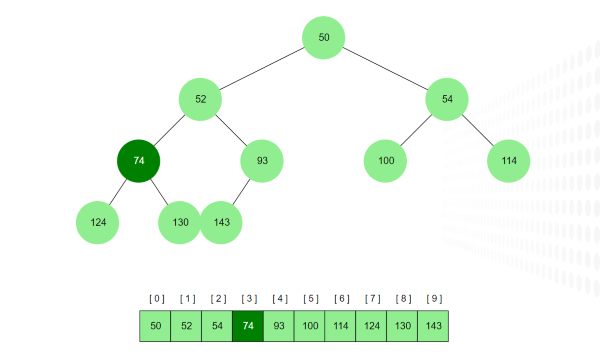

# GrPA 3

In [91]:
def swap(heap, i, j):
  heap[i], heap[j] = heap[j], heap[i]


def heapify_down(heap, parent_index):
  left = parent_index*2+1
  right = parent_index*2+2
  largest = parent_index
  if left < len(heap) and heap[left] > heap[largest]:
    largest = left
  if right < len(heap) and heap[right] > heap[largest]:
    largest = right
  if largest != parent_index:
    swap(heap, parent_index, largest)
    heapify_down(heap, largest)


def min_max(heap):
  middle_index = len(heap)//2-1
  for i in range(middle_index, -1, -1):
    heapify_down(heap, i)
  return heap


# min_max([66, 55, 43, 34, 12, 7, 2, 20, 5])
min_max([10, 14, 19, 26, 31, 42, 27, 44, 35, 33])

[44, 35, 42, 26, 33, 19, 27, 10, 14, 31]

In [83]:
# 10 14 19 26 31 42 27 44 35 33